In [61]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.optimizers import Adam
from tensorflow.keras import layers
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from matplotlib import pyplot as plt

In [30]:
fuel = pd.read_csv('/home/alex/Projects/DataSci/SampleData/Kaggle/fuel.csv')

In [ ]:
X = fuel.copy()
# Remove target
y = X.pop('FE')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse_output=False),
     make_column_selector(dtype_include=object)),
)

X_train = preprocessor.fit_transform(X_train)
y_train = np.log(y_train) # log transform target instead of standardizing

input_shape = [X_train.shape[1]]

In [52]:
pd.DataFrame(X_train[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.134931,1.082036,0.524917,0.682958,-0.225018,0.39094,0.427068,0.452376,-0.427008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.853686,-1.048664,-0.192844,0.682958,-0.225018,0.39094,0.427068,0.452376,-0.427008,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.159628,-1.048664,-0.192844,0.682958,-0.225018,0.39094,0.427068,-2.210549,-0.427008,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.012348,0.016686,0.524917,0.682958,-0.225018,0.39094,0.427068,-2.210549,-0.427008,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.088834,0.016686,0.524917,-1.464220,-0.225018,0.39094,0.427068,0.452376,2.341874,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss='mae',

)

model_v1 = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=200
)

Epoch 1/200


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9743  
Epoch 2/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5068 
Epoch 3/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2632 
Epoch 4/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1892 
Epoch 5/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1541 
Epoch 6/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1466 
Epoch 7/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1819 
Epoch 8/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1739 
Epoch 9/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1478 
Epoch 10/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1520 
Epoch 11/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1590 
Epoch 12/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0840 
Epoch 13/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0881 
Epoch 14/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0776 
Epoch 15/200
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0969 
Epoch 16/200
7/7 ━━━━━━━━━━━━━

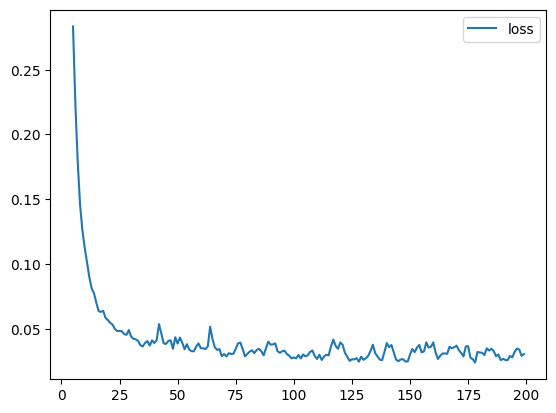

In [55]:
history_df = pd.DataFrame(model_v1.history)
history_df.loc[5:, ['loss']].plot();